In [1]:
import pandas as pd
import pycaret
from pycaret.regression import *
from pycaret.classification import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Reading CSV file

In [2]:
# reading csv file 
df = pd.read_csv("complete_transport_weather.csv")

In [3]:
# first 5 rows 
df.head(5)

,Unnamed: 0,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


In [4]:
# dropping unnamed column
df = df.drop("Unnamed: 0", 1)

In [5]:
# checking first 5 rows to confirm column was dropped
df.head(5)

,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


In [6]:
# shape of data frame
df.shape

(543831, 10)

# Models
## References 
- https://builtin.com/data-science/pandas-show-all-columns
- https://stackoverflow.com/questions/63321022/use-mask-to-filter-data-frame-with-value-counts
- https://towardsdatascience.com/introduction-to-regression-in-python-with-pycaret-d6150b540fc4
- https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb
- https://sparkbyexamples.com/pandas/pandas-isin-explained-with-examples/
- https://softhints.com/pandas-how-to-filter-results-of-value_counts/
- https://pycaret.gitbook.io/docs/get-started/functions/analyze

In [7]:
# print the number of instances of each value in the total_people column
pd.set_option("display.max_rows", None)
occupany_values = df["total_people"].value_counts()
print(occupany_values)

1.0        8392
2.0        4610
3.0        3167
4.0        2664
5.0        2437
6.0        2237
7.0        2158
8.0        2056
9.0        1935
10.0       1867
13.0       1840
11.0       1820
12.0       1816
14.0       1770
16.0       1763
18.0       1709
17.0       1697
15.0       1676
20.0       1654
23.0       1590
22.0       1588
21.0       1579
24.0       1575
19.0       1570
32.0       1493
29.0       1480
28.0       1462
38.0       1461
25.0       1455
30.0       1449
34.0       1435
36.0       1429
31.0       1427
27.0       1421
33.0       1417
44.0       1412
43.0       1402
39.0       1401
26.0       1398
40.0       1388
37.0       1384
35.0       1374
41.0       1369
48.0       1359
45.0       1357
46.0       1352
47.0       1349
42.0       1347
51.0       1329
49.0       1325
58.0       1304
52.0       1301
53.0       1298
50.0       1291
61.0       1278
59.0       1271
62.0       1258
57.0       1242
55.0       1238
60.0       1236
66.0       1230
56.0       1224
65.0    

In [8]:
# number of instances of each value in the total people count
occupancy = df["total_people"].value_counts()

In [9]:
# filter for rows that have at least two instances
permitted_values = occupancy[occupancy >=2].index

In [10]:
# filter for rows with permitted number of instances
permitted_occupancy = df[df["total_people"].isin(permitted_values)]

In [11]:
# first 5 rows
permitted_occupancy.head(5)

,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


# Busyness Columns
## Sources
- https://pbpython.com/groupby-agg.html
- https://sparkbyexamples.com/pandas/pandas-groupby-aggregate-explained/?expand_article=1

In [12]:
# descriptive stats
permitted_occupancy.describe()

,LocationID,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
count,541010.000000,541010.000000,541010.000000,541010.000000,541010.000000,541010.000000,541010.000000,541010.000000,541010.000000
mean,149.658516,6.527166,3.010972,11.642424,12.776006,0.117395,0.001972,11.561814,1056.663542
std,73.845040,3.439980,1.999759,6.886579,9.734638,0.440257,0.037437,5.725014,1576.989654
min,4.000000,1.000000,0.000000,0.000000,-13.800000,0.000000,0.000000,0.000000,1.000000
25%,90.000000,4.000000,1.000000,6.000000,4.800000,0.000000,0.000000,7.400000,88.000000
50%,148.000000,7.000000,3.000000,12.000000,12.500000,0.000000,0.000000,10.500000,459.000000
75%,230.000000,10.000000,5.000000,18.000000,20.600000,0.000000,0.000000,14.800000,1367.000000
max,263.000000,12.000000,6.000000,23.000000,36.000000,7.100000,1.960000,37.700000,23997.000000


In [13]:
# creating percentile data frame 
percentiles = permitted_occupancy.groupby("LocationID")["total_people"].agg([lambda x: x.quantile(0.25),
                                                                                      lambda x: x.quantile(0.5),
                                                                                      lambda x: x.quantile(0.75)]
                                                                                     ).reset_index()

In [14]:
# first 5 rows
percentiles.head(5)

,LocationID,<lambda_0>,<lambda_1>,<lambda_2>
0,4,10.0,21.0,38.0
1,12,2.0,5.0,11.0
2,13,25.0,56.0,77.0
3,24,98.0,333.0,502.0
4,41,293.0,1001.0,1588.0


In [15]:
# shape of data frame
percentiles.shape

(67, 4)

In [16]:
# renaming columns
percentiles.rename(columns = {"<lambda_0>" : "25th_percentile", "<lambda_1>" : "50th_percentile",
                                        "<lambda_2>" : "75th_percentile"}, inplace = True)

In [17]:
# confirm columns name change
percentiles.head(5)

,LocationID,25th_percentile,50th_percentile,75th_percentile
0,4,10.0,21.0,38.0
1,12,2.0,5.0,11.0
2,13,25.0,56.0,77.0
3,24,98.0,333.0,502.0
4,41,293.0,1001.0,1588.0


In [18]:
percentiles.to_csv("final_busyness_percentiles.csv")

In [40]:
permitted_occupancy.head(5)

,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


In [41]:
# setting up environment for model
# reduced the number of folds to decrease processing time
# numeric_features parameter used to define data types
# total_people assigned as target column
model_setup = setup(permitted_occupancy, target = "total_people", fold = 5, numeric_features = ["LocationID", 
                                                                                   "temperature_2m (°C)", 
                                                                                  "rain (mm)",
                                                                                  "snowfall (cm)",
                                                                                  "windspeed_10m (km/h)",
                                                                                  "month",
                                                                                  "dayofweek",
                                                                                  "hour"])



,Description,Value
0,Session id,8160
1,Target,total_people
2,Target type,Regression
3,Original data shape,"(541010, 10)"
4,Transformed data shape,"(541010, 10)"
5,Transformed train set shape,"(378707, 10)"
6,Transformed test set shape,"(162303, 10)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [42]:
features_order = get_config("X").columns.to_list
print(features_order)

<bound method IndexOpsMixin.tolist of Index(['LocationID', 'time', 'month', 'dayofweek', 'hour',
       'temperature_2m (°C)', 'rain (mm)', 'snowfall (cm)',
       'windspeed_10m (km/h)'],
      dtype='object')>


In [108]:
# saving data frame for visualisation 
permitted_occupancy.to_csv("visualisation_data.csv")

In [43]:
# comparing models
models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,124.9242,91556.4383,302.5475,0.9631,0.3124,0.3091,30.4900
et,Extra Trees Regressor,128.1803,91528.7856,302.5154,0.9631,0.4881,0.8059,46.6380
dt,Decision Tree Regressor,163.3633,149682.0870,386.8190,0.9396,0.3874,0.3354,0.5800
lightgbm,Light Gradient Boosting Machine,242.4329,185421.7088,430.5856,0.9252,1.0282,5.1809,0.7120
gbr,Gradient Boosting Regressor,475.6914,657606.2647,810.9246,0.7347,1.4638,14.6048,7.0240
knn,K Neighbors Regressor,697.4729,1568685.1500,1252.4649,0.3671,1.4671,17.7104,0.6260
en,Elastic Net,835.0872,1927273.6689,1388.2535,0.2225,1.8527,27.2271,0.2400
br,Bayesian Ridge,835.0738,1927278.7860,1388.2553,0.2225,1.8528,27.2274,0.2000
llar,Lasso Least Angle Regression,835.0894,1927275.3926,1388.2541,0.2225,1.8527,27.2270,0.2060
lar,Least Angle Regression,835.0904,1927270.3208,1388.2523,0.2225,1.8526,27.2263,0.2760


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



## Creating Models

### Random Forest Regressor

In [44]:
# creating random forest model
random_forest = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,124.2752,90083.0132,300.1383,0.9635,0.3106,0.3030
1,123.6020,88368.7150,297.2688,0.9642,0.3119,0.3057
2,125.8333,96004.3186,309.8456,0.9614,0.3201,0.3219
3,125.5390,89743.4951,299.5722,0.9636,0.3087,0.3118
4,125.3715,93582.6494,305.9128,0.9627,0.3106,0.3030
Mean,124.9242,91556.4383,302.5475,0.9631,0.3124,0.3091
Std,0.8455,2810.9961,4.6284,0.0010,0.0040,0.0072


In [45]:
print(random_forest)

RandomForestRegressor(n_jobs=-1, random_state=8160)


### Extra Trees Regressor

In [46]:
# creating extra trees model
extra_trees = create_model("et")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,127.4551,89344.6538,298.9058,0.9638,0.4869,0.8079
1,127.5782,90633.3463,301.0537,0.9633,0.4882,0.8068
2,128.1799,95222.8354,308.5820,0.9617,0.4927,0.8177
3,129.0866,89639.4588,299.3985,0.9637,0.4827,0.7697
4,128.6015,92803.6339,304.6369,0.9630,0.4901,0.8275
Mean,128.1803,91528.7856,302.5154,0.9631,0.4881,0.8059
Std,0.6144,2209.6625,3.6383,0.0008,0.0033,0.0196


In [47]:
print(extra_trees)

ExtraTreesRegressor(n_jobs=-1, random_state=8160)


### Decision Tree Regressor

In [48]:
# creating decision trees regressor
decision_tree = create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,163.8959,149945.1866,387.2276,0.9393,0.3894,0.3332
1,160.6006,142893.1678,378.0121,0.9421,0.3891,0.3266
2,162.8475,147052.6477,383.4744,0.9408,0.3960,0.3570
3,163.8676,148492.0829,385.3467,0.9398,0.3826,0.3405
4,165.6051,160027.3500,400.0342,0.9361,0.3798,0.3199
Mean,163.3633,149682.0870,386.8190,0.9396,0.3874,0.3354
Std,1.6409,5683.5407,7.2900,0.0020,0.0057,0.0128


In [49]:
print(decision_tree)

DecisionTreeRegressor(random_state=8160)


In [ ]:
## Feature Importance

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



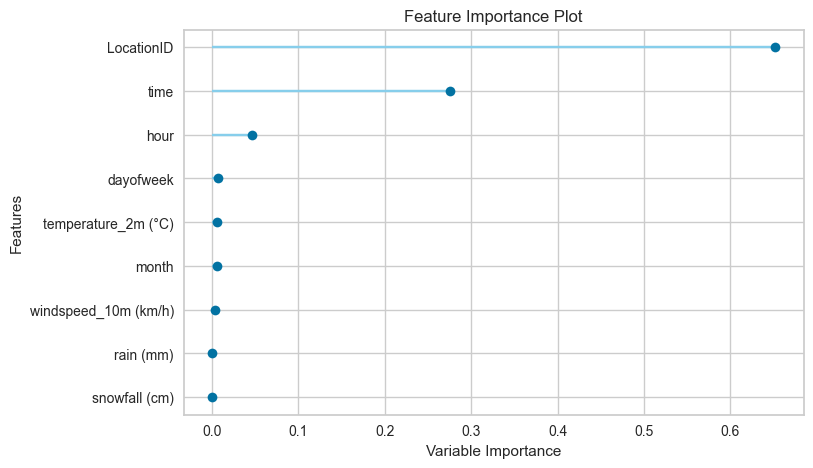

In [85]:
plot_model(random_forest, plot = "feature")

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



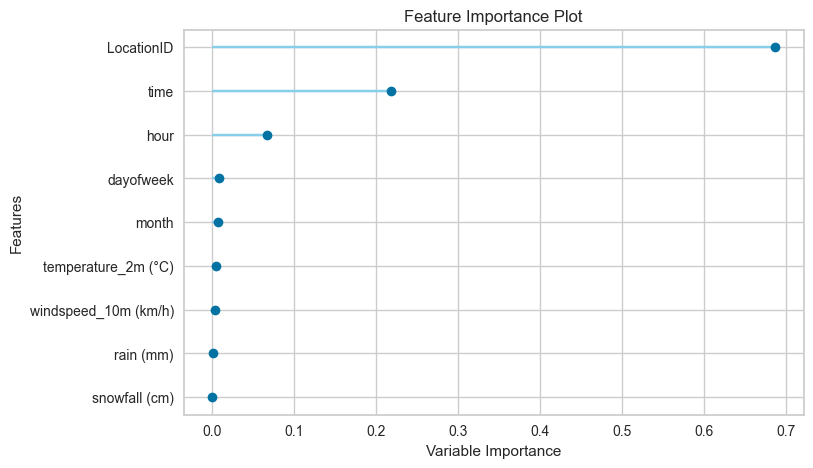

In [86]:
plot_model(extra_trees, plot = "feature")

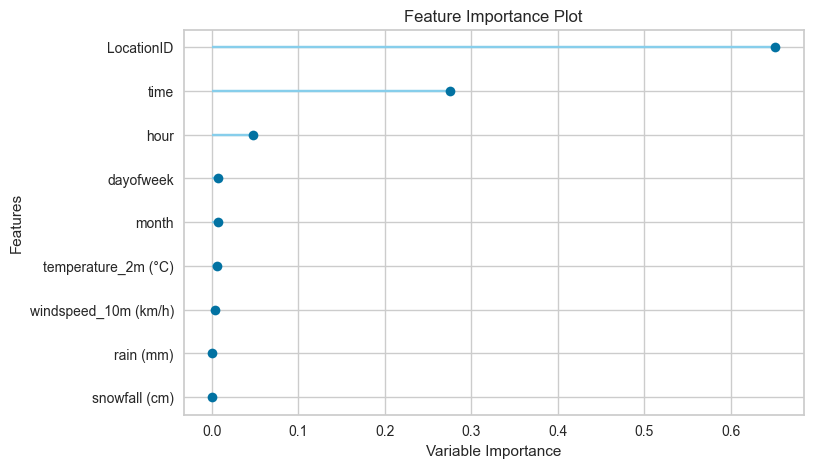

In [87]:
plot_model(decision_tree, plot = "feature")

# New Models with less features max depth and estimator

In [140]:
new_data = permitted_occupancy.drop(["temperature_2m (°C)", "rain (mm)", 
                                     "snowfall (cm)", "windspeed_10m (km/h)"], axis = 1)


In [141]:
# creating unseen data to test model with after finalising
# data for train test split 
data = new_data.sample(frac = 0.9, random_state = 67)
# unseen data
unseen_data = new_data.drop(data.index)

In [142]:
# reseting index
data.reset_index(drop = True, inplace = True)
unseen_data.reset_index(drop = True, inplace = True)

In [143]:
# data shape
data_shape = data.shape

In [144]:
# unseen data shape
unseen_data_shape = unseen_data.shape

In [145]:
print(f"Data for Model: {data_shape}")
print(f"Unseen Data: {unseen_data_shape}")

Data for Model: (486909, 6)
Unseen Data: (54101, 6)


In [146]:
# setup 
new_model_setup = setup(data, target = "total_people", fold = 5, numeric_features = ["LocationID", 
                                                                                  "month",
                                                                                  "dayofweek",
                                                                                  "hour"])

,Description,Value
0,Session id,4187
1,Target,total_people
2,Target type,Regression
3,Original data shape,"(486909, 6)"
4,Transformed data shape,"(486909, 6)"
5,Transformed train set shape,"(340836, 6)"
6,Transformed test set shape,"(146073, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


## Creating New Models

### Random Forest Regressor

In [147]:
# creating random forest model
new_random_forest = create_model("rf", max_depth = 19, n_estimators = 40)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,131.1979,98702.5446,314.1696,0.9596,0.3454,0.3514
1,133.4665,108830.6910,329.8950,0.9565,0.3626,0.4025
2,131.1596,96099.6509,309.9994,0.9612,0.3508,0.3820
3,133.4137,101113.7852,317.9839,0.9606,0.3501,0.3731
4,131.4168,97497.7980,312.2464,0.9597,0.3619,0.3943
Mean,132.1309,100448.8939,316.8589,0.9595,0.3541,0.3807
Std,1.0727,4502.6930,7.0252,0.0016,0.0069,0.0177


In [148]:
print(new_random_forest)

RandomForestRegressor(max_depth=19, n_estimators=40, n_jobs=-1,
                      random_state=4187)


### Extra Trees Regressor

In [149]:
# creating extra trees model
new_extra_trees = create_model("et", max_depth = 19, n_estimators = 40)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,169.9884,142798.1246,377.8864,0.9416,0.6792,1.5319
1,164.1491,143697.7481,379.0749,0.9426,0.6486,1.4180
2,173.9843,143456.9812,378.7572,0.9420,0.7005,1.6885
3,169.0829,141453.0958,376.1025,0.9449,0.6761,1.5270
4,169.6232,137732.3138,371.1230,0.9431,0.6759,1.5167
Mean,169.3656,141827.6527,376.5888,0.9428,0.6761,1.5364
Std,3.1330,2191.1585,2.9215,0.0012,0.0165,0.0868


In [150]:
print(new_extra_trees)

ExtraTreesRegressor(max_depth=19, n_estimators=40, n_jobs=-1, random_state=4187)


### Decision Tree Regressor

In [151]:
# creating decision trees regressor
new_decision_tree = create_model("dt", max_depth = 25)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,157.1797,142648.2735,377.6881,0.9416,0.3822,0.3256
1,162.0463,162276.3668,402.8354,0.9351,0.3829,0.3416
2,159.6739,142995.0402,378.1468,0.9422,0.3844,0.3459
3,162.2075,148146.3163,384.8978,0.9423,0.3866,0.3410
4,158.6864,143873.3704,379.3064,0.9406,0.3851,0.3197
Mean,159.9588,147987.8734,384.5749,0.9404,0.3842,0.3348
Std,1.9410,7410.1956,9.4874,0.0027,0.0016,0.0102


In [152]:
print(new_decision_tree)

DecisionTreeRegressor(max_depth=25, random_state=4187)


## Plotting Random Forest and Decision Tree Models

### Random Forest Prediction Error Plot

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



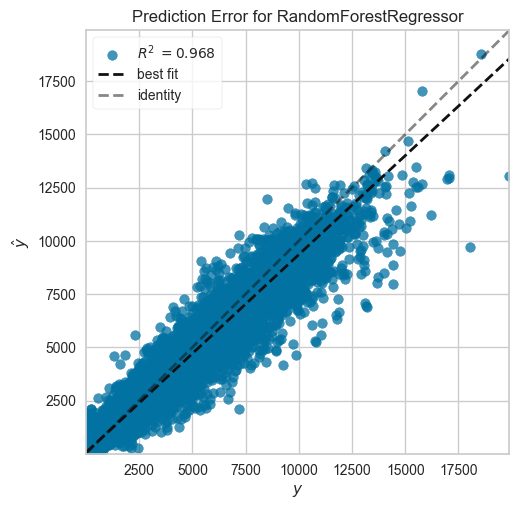

In [155]:
plot_model(new_random_forest, plot = "error")

### Random Forest Feature Importance Plot

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



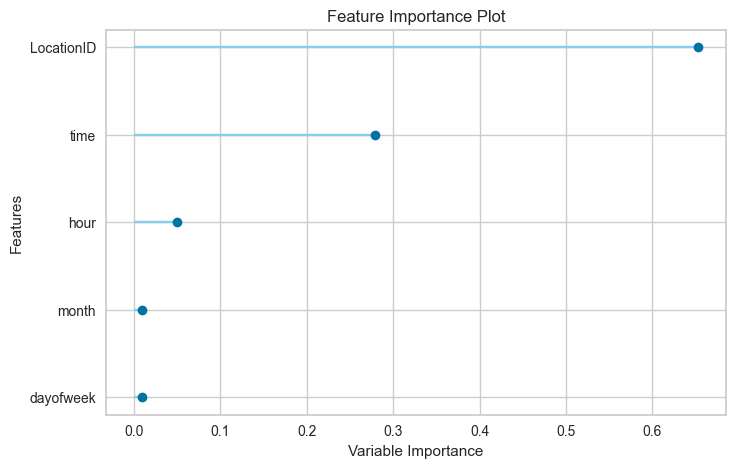

In [157]:
plot_model(new_random_forest, plot = "feature")

### Random Forest Learning Curve

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



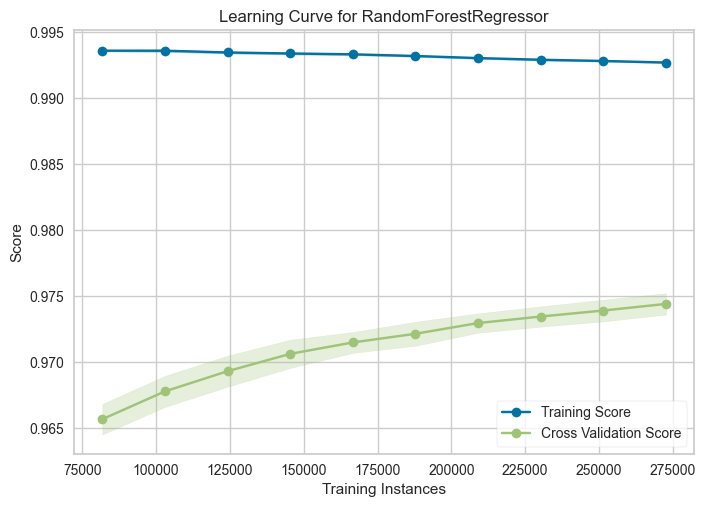

In [166]:
plot_model(new_random_forest, plot = "learning")

### Decision Tree Prediction Error Plot

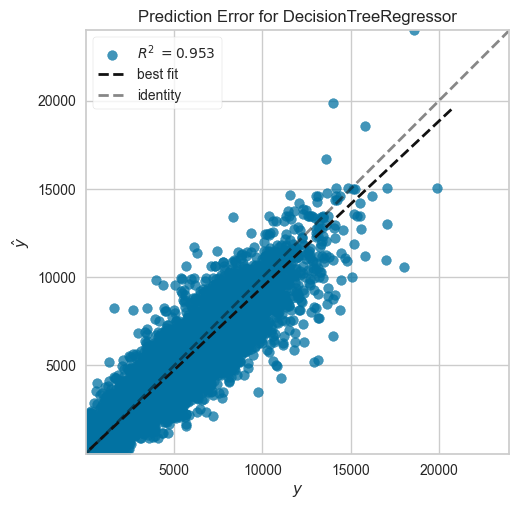

In [158]:
plot_model(new_decision_tree, plot = "error")

### Decision Tree Feature Importance Plot

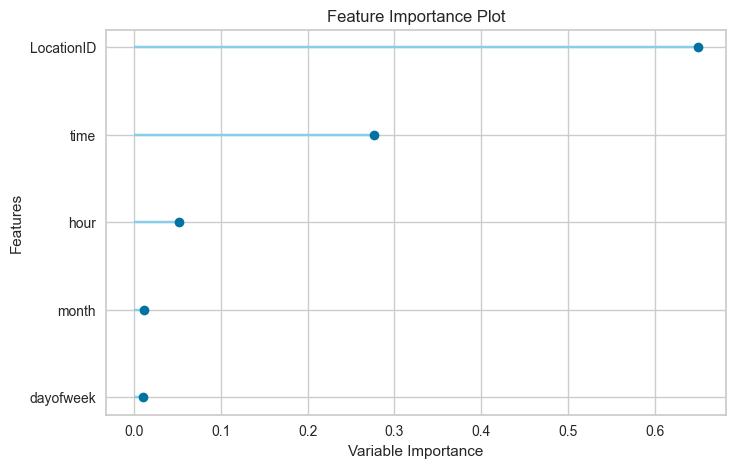

In [156]:
plot_model(new_decision_tree, plot = "feature")

### Decision Tree Learning Curve

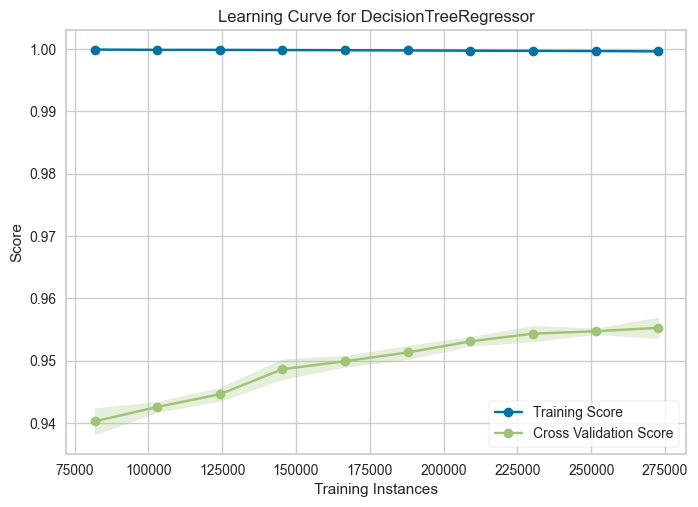

In [162]:
plot_model(new_decision_tree, plot = "learning")

## Predictions on Test Sample

In [167]:
# random forest
predict_model(new_random_forest)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,120.1921,81087.1274,284.7580,0.9678,0.3250,0.3265


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



,LocationID,time,month,dayofweek,hour,total_people,prediction_label
16532,211,2022-04-15 10:00:00,4,4,10,143.0,90.125241
468423,161,2022-02-23 14:00:00,2,2,14,6671.0,5974.490385
282792,4,2022-11-13 20:00:00,11,6,20,55.0,38.911987
419550,249,2022-08-31 15:00:00,8,2,15,2864.0,2676.761269
180790,12,2022-07-03 09:00:00,7,6,9,13.0,18.038367
...,...,...,...,...,...,...,...
272660,113,2022-05-13 01:00:00,5,4,1,101.0,91.122039
136159,151,2022-04-27 08:00:00,4,2,8,962.0,908.003030
257432,68,2022-06-01 17:00:00,6,2,17,212.0,294.425058
241204,127,2022-12-03 20:00:00,12,5,20,131.0,204.220048


In [168]:
# decision tree
predict_model(new_decision_tree)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,145.5903,118880.3169,344.7903,0.9528,0.3663,0.3286


,LocationID,time,month,dayofweek,hour,total_people,prediction_label
16532,211,2022-04-15 10:00:00,4,4,10,143.0,85.000000
468423,161,2022-02-23 14:00:00,2,2,14,6671.0,7124.000000
282792,4,2022-11-13 20:00:00,11,6,20,55.0,45.000000
419550,249,2022-08-31 15:00:00,8,2,15,2864.0,2319.000000
180790,12,2022-07-03 09:00:00,7,6,9,13.0,18.000000
...,...,...,...,...,...,...,...
272660,113,2022-05-13 01:00:00,5,4,1,101.0,97.785714
136159,151,2022-04-27 08:00:00,4,2,8,962.0,876.000000
257432,68,2022-06-01 17:00:00,6,2,17,212.0,323.000000
241204,127,2022-12-03 20:00:00,12,5,20,131.0,222.000000


# Finalising Models

## Random Forest

In [169]:
# fitting random forest model on entire data set
final_random_forest = finalize_model(new_random_forest)

In [170]:
print(final_random_forest)

Pipeline(memory=FastMemory(location=/var/folders/6b/tc94k9n157g920l0_fmhzz000000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LocationID', 'month', 'dayofweek',
                                             'hour'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['time'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['time'],
                                    transformer=TargetEncoder(cols=['time'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator',
                 RandomForestRegressor(max_depth=19, n_estimators=40, n_jobs=-1,
                                       random_state=4187))])


## Decision Tree

In [171]:
# fitting decision tree model on entire data set
final_decision_tree = finalize_model(new_decision_tree)

In [172]:
print(final_decision_tree)

Pipeline(memory=FastMemory(location=/var/folders/6b/tc94k9n157g920l0_fmhzz000000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['LocationID', 'month', 'dayofweek',
                                             'hour'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['time'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['time'],
                                    transformer=TargetEncoder(cols=['time'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator',
                 DecisionTreeRegressor(max_depth=25, random_state=4187))])


# Predition on Unseen Data

## Random Forest Model

In [173]:
unseen_predictions_rf = predict_model(final_random_forest, data = unseen_data
                                  )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,92.7765,47838.3287,218.7197,0.9804,0.2608,0.2214


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



In [174]:
unseen_predictions_rf.head(5)

,LocationID,time,month,dayofweek,hour,total_people,prediction_label
0,24,2022-02-01 09:00:00,2,1,9,279.0,259.831250
1,24,2022-02-01 21:00:00,2,1,21,151.0,133.765208
2,24,2022-02-02 03:00:00,2,2,3,4.0,8.911446
3,24,2022-02-02 10:00:00,2,2,10,232.0,219.654107
4,24,2022-02-02 15:00:00,2,2,15,599.0,622.338690


## Decision Tree Model

In [176]:
unseen_predictions_dt = predict_model(final_decision_tree, data = unseen_data
                                  )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,113.6151,74406.4002,272.7754,0.9695,0.3177,0.2439


In [177]:
unseen_predictions_dt.head(5)

,LocationID,time,month,dayofweek,hour,total_people,prediction_label
0,24,2022-02-01 09:00:00,2,1,9,279.0,251.0
1,24,2022-02-01 21:00:00,2,1,21,151.0,78.0
2,24,2022-02-02 03:00:00,2,2,3,4.0,6.0
3,24,2022-02-02 10:00:00,2,2,10,232.0,219.0
4,24,2022-02-02 15:00:00,2,2,15,599.0,651.0


# Saving Model

In [178]:
# random forest model
save_model(final_random_forest, "final_random_forest_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/6b/tc94k9n157g920l0_fmhzz000000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['LocationID', 'month', 'dayofweek',
                                              'hour'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['time'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['time'],
                                     transformer=TargetEncoder(cols=['time'],
                                                               handle_missing='return_nan'))),
                 ('actual_estimator',
                  RandomForestRegressor(max_depth=19, n_estimators=40, n_jobs=-1,
                                        random_state=4187))]),
 'final_random_forest_model

In [179]:
# decision tree model
save_model(final_decision_tree, "final_decision_tree_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/6b/tc94k9n157g920l0_fmhzz000000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['LocationID', 'month', 'dayofweek',
                                              'hour'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['time'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['time'],
                                     transformer=TargetEncoder(cols=['time'],
                                                               handle_missing='return_nan'))),
                 ('actual_estimator',
                  DecisionTreeRegressor(max_depth=25, random_state=4187))]),
 'final_decision_tree_model.pkl')